Team Project: Group #10
Fraudulent transaction detection


# <div align="center"> Fraud Detection Amongst Credit Card Transactions </div>  
###### <div align="center"> Authors: Adeel Shah, Anasuya Ghosh, Daniel Henry, Qimei Huang, Viktoriia Ganzenko </div>

## Introduction
With the continuous evolution of technology, worldwide commerce has adapted to leverage new methods as they became available. In 1950 after forgetting his wallet during a business dinner at a New York restaurant named "Cabin Grill", Frank McNamara came up with the idea to create the "Diners club card". This was essentially a charge card that worked on credit, users were able to make multiple purchases and pay off the total expense incurred at the end of each month. Fast forward to 2018 and there are now 41 billion general purpose credit cards in the hands of consumer in the United States accounting for $3.8 trillion USD of annual volume. This level of growth has presented card issuers with a unique issue they must face, picking the proverbial fraudulent needle out of the non-fraudulent haystack. How could credit card issuers identify and reject what is believed to be a fraudulent transaction when most transactions are not? This is the problem that will be explored within this notebook, we will be using and we will be applying common data science principals to develop an algorithm that can classify a transaction as fraudulent or not based on its attributes.



### About the data
The data set we are working with was sourced from <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Kaggle</a> and is a collection of transactions made in 2013 by European cardholders. These transactions took place over the course of 2 for a total of 284,807 trades, 492 of which are fraudulent. The data contains time, amount and classification of each transaction as well as 28 variables that have already undergone a PCA transformation, a description of these variables could not be shared to protect the confidentiality of the transactions.


### Goals
- Collect the and clean (if required) the data
- Perform primilinary inspection of the data
- Determine charatarists of each classfication
- Prepare data for classification
- Predict classification based on transaction data

### References: 
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
- https://www.creditcards.com/credit-card-news/market-share-statistics.php
- https://www.creditcards.com/credit-card-news/history-of-credit-cards.php
- https://www.kaggle.com/mlg-ulb/creditcardfraud

### Preparing the notebook

In this notebook we use various standard Python libraries in order to inspect, analyize and classify the data. All of the required libraries are loaded here

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Gathering the Data

Github restricts file sizes to 100MB and the dataset we're working with is just under 1GB, for this reason within our reposity the data has been split into 7 seperate CSVs (around 20MB each). The expectation is that the user of this notebook has cloned the entire reposity and so the CSVs can be loaded with a simple "read_csv" command. Once loaded the CSVs are appended into a single dataframe "df"



In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc01.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc02.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc03.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc04.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc05.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc06.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc07.csv")

df= df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)
print(df.describe())
df.shape


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.758743e-12 -8.252298e-13 -9.636929e-13  8.316157e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.591952e-13  4.247354e-13 -3.050180e-13  8.693344e-14 -1.179712e-12   
std    1.380247e+00  1.332271e+00  1.23709

(284807, 31)

This data set consists 284,807 rows and 31 columns.

### Initial inspection

In [3]:
#df.info()
#print(df)
d=df[['Time','Amount','Class']]


fraud = d['Class']>0
zero_transactions = d['Amount']<0.01
#print(fraud.info())
print(d[fraud].describe())
print(d[zero_transactions].describe())
#print(d[fraud & zero_transactions].info()

fraud_mean=d[fraud].mean()
fraud_stdev=d[fraud].std()
print(fraud_mean)
print (df.head())
#fraud_amount = fraud['Amount']
#np=fraud['Amount'].to_numpy()
#=np.array(fraud['Amount'])

print (df.tail())


                Time       Amount  Class
count     492.000000   492.000000  492.0
mean    80746.806911   122.211321    1.0
std     47835.365138   256.683288    0.0
min       406.000000     0.000000    1.0
25%     41241.500000     1.000000    1.0
50%     75568.500000     9.250000    1.0
75%    128483.000000   105.890000    1.0
max    170348.000000  2125.870000    1.0
                Time  Amount        Class
count    1825.000000  1825.0  1825.000000
mean    89370.688767     0.0     0.014795
std     48065.662780     0.0     0.120763
min       282.000000     0.0     0.000000
25%     47284.000000     0.0     0.000000
50%     83419.000000     0.0     0.000000
75%    131288.000000     0.0     0.000000
max    172759.000000     0.0     1.000000
Time      80746.806911
Amount      122.211321
Class         1.000000
dtype: float64
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0

There are no null records (or no missing values) and accordingly there is no need to fill any rows or drop any rows where data is null. 
Most of the columns are float type, and only Class column is int type. This class column is the target value, 1 means fraud and 0 means non-fraud.

Above shows that fraud data has 492 rows which is 0.173% of the dataset, and non-fraud data has 176, 033 rows which is 99.827% of the dataset. This is an unbalanced dataset.

In [10]:
allfraud = df[df.Class == 1]
allnonfraud = df[df.Class == 0]
print(count)
print(len(allfraud))

3714
492


Text(0.5, 1.0, 'Class Distributions \n (0 = non-fraud and 1 = fraud)')

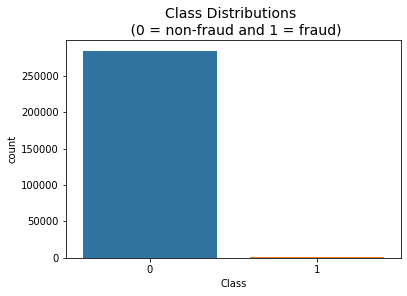

In [4]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0 = non-fraud and 1 = fraud)', fontsize=14)

The bar chart above visulizes this unbalanced dataset. It shows that there are much more non-fraud data than fraud data.

#Data Preprocessing
The following is shows how to scale the data, column time and amount are not scaled yet before fit them into model.

In [5]:
#This apply scaler to column amount and time
from sklearn.preprocessing import StandardScaler, RobustScaler
amount = df['Amount'].values.reshape(-1, 1)
transformer = RobustScaler().fit(amount)
df['scale_amount'] = transformer.transform(amount)
df['scale_amount'].head()

0    1.783274
1   -0.269825
2    4.983721
3    1.418291
4    0.670579
Name: scale_amount, dtype: float64

In [6]:
#transfer data into 2D array repeat steps above
time = df['Time'].values.reshape(-1, 1)
transformer2 = RobustScaler().fit(time)
df['scale_time'] = transformer2.transform(time)
df['scale_time'].head()

0   -0.994983
1   -0.994983
2   -0.994972
3   -0.994972
4   -0.994960
Name: scale_time, dtype: float64

In [7]:
#drop the column without scale
df.drop(['Time','Amount'], axis=1, inplace=True)

This method is to remove some data and match a 50/50 ratio on the new dataset.

In [8]:
df_random = df.sample(frac=1) #return random sample items
# amount of fraud classes 492 rows
fraud_df = df_random.loc[df_random['Class']==1] #dataset for fraud
non_fraud_df = df_random.loc[df_random['Class']==0][:492] #dataset for non_fraud

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Shuffle dataframerows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scale_amount,scale_time
5450,-0.398795,0.922935,1.119522,-0.168112,0.294661,-0.035998,0.419575,0.320456,-0.403879,-0.340596,...,-0.647843,-0.024471,-0.401251,-0.272440,0.109658,0.248576,0.077859,0,-0.282401,-0.054935
8335,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1,-0.293440,-0.864214
41301,-6.726907,-0.272924,1.293242,3.998308,3.983929,0.475123,-9.382508,-6.538176,0.081011,0.867086,...,0.815698,-5.126557,-0.265861,-1.744947,0.159925,0.407805,0.058212,0,-0.307413,-0.384333
575,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,-7.864506,...,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,1,-0.202334,-0.329445
18429,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1,4.781527,-0.507372


### Data Analysis

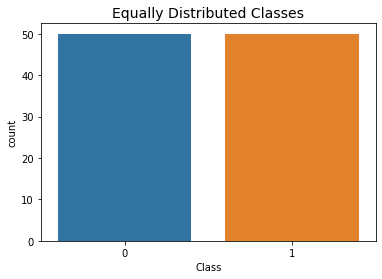

In [11]:
balancedset = pd.concat([allfraud.sample(n=50), allnonfraud.sample(n=50)])
sns.countplot('Class', data=balancedset)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

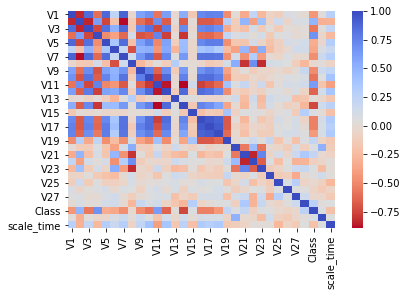

In [12]:
#use subsample to plot correlation
sub_sample_corr = balancedset.corr()
sns.heatmap(sub_sample_corr,cmap='coolwarm_r', annot_kws={'size':20})
plt.show()

In order to find which varaiable have the most bearing on classifing a transaction as frad or non-fraud, below we plot the range of values for each variable (V1-V28) on the Y axes against the class on the X access with each variable seperated by a factor of 0.1 so they do not all appear on 1 of 2 lines.

This allows us to visually see that transactions that are fraudulent typically have values much high or lower than their non-fraudulent counterparts.

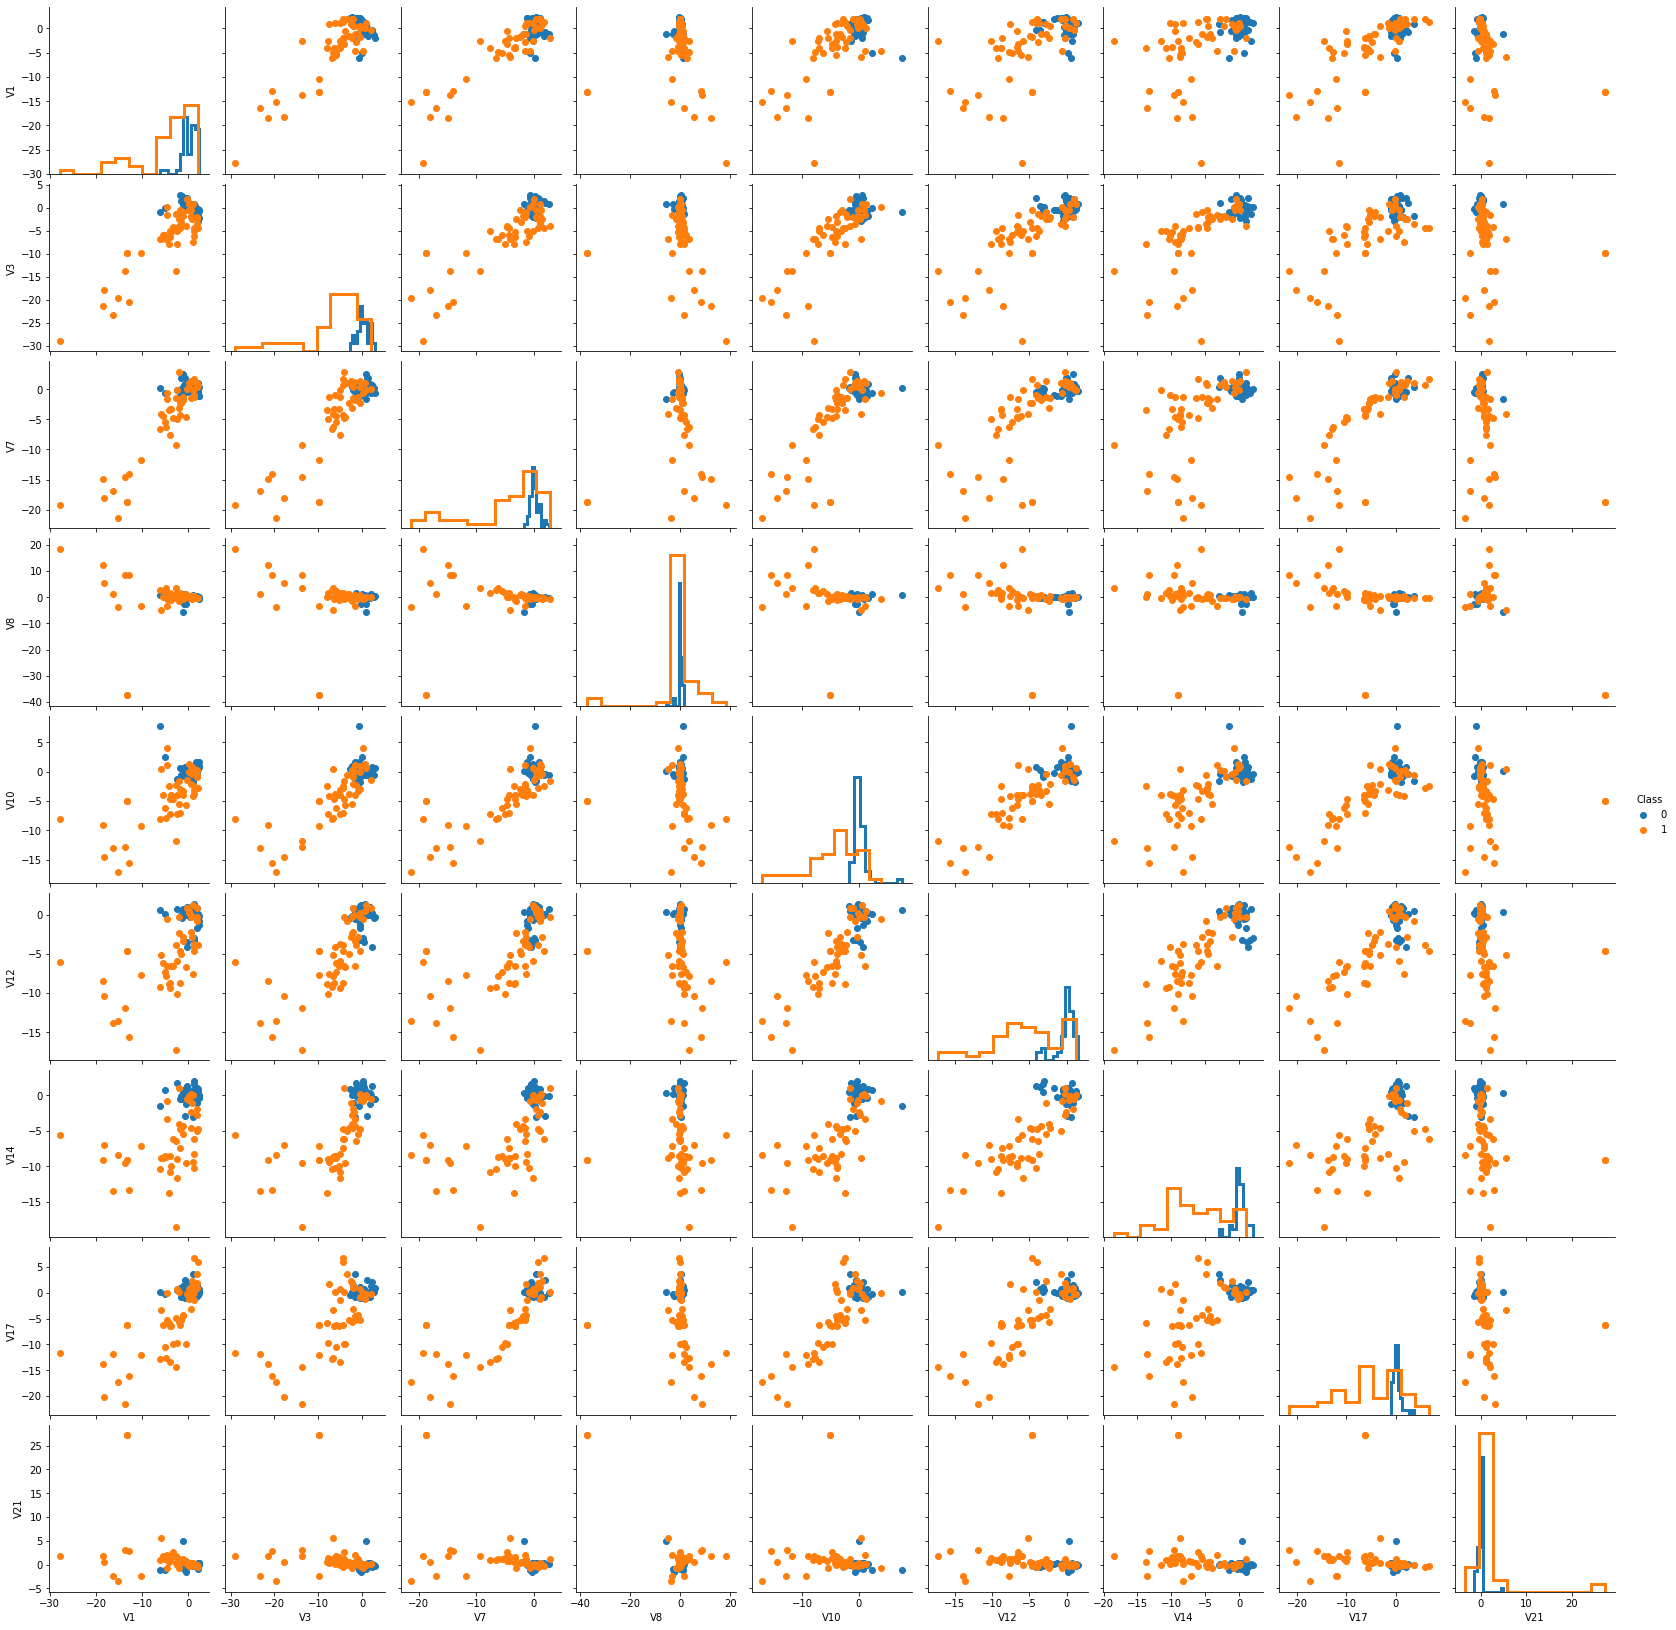

In [13]:
grid = sns.PairGrid(balancedset, hue="Class", vars=["V1", "V3", "V7", "V8", "V10", "V12", "V14", "V17", "V21"])
grid.map_offdiag(plt.scatter)
grid.map_diag(plt.hist, histtype="step", linewidth=3)
grid.add_legend();

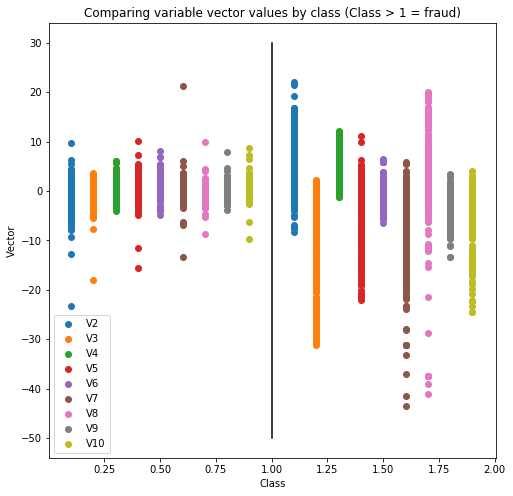

In [14]:
balancedset = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*2)])
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 1:10]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

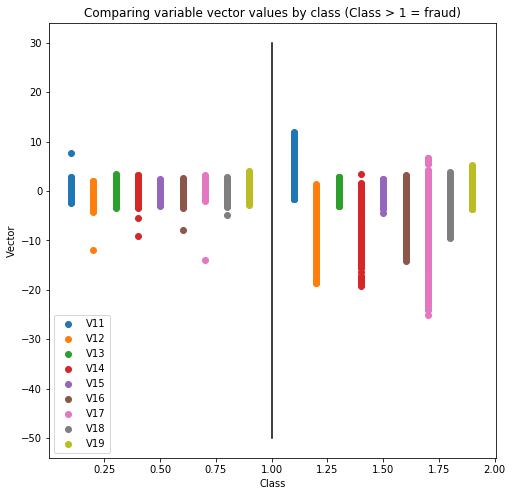

In [15]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 10:19]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

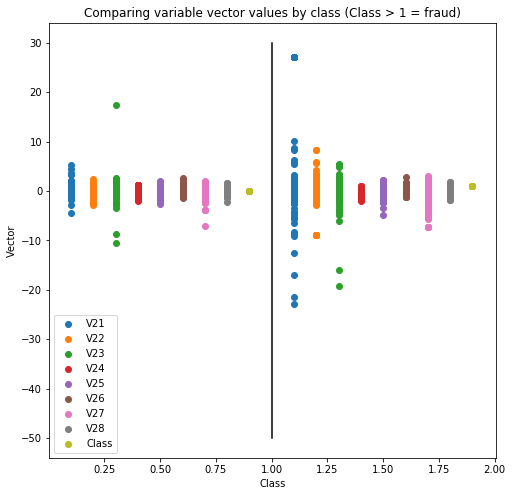

In [16]:
plt.figure(figsize=(8,8))
for idx, column in enumerate(balancedset.iloc[:, 20:29]):
    plt.scatter(balancedset.Class + (0.1 * idx) + 0.1, balancedset[column], label = column)
plt.plot([1, 1], [-50,30], 'k')
plt.xlabel('Class')
plt.ylabel('Vector')
plt.title('Comparing variable vector values by class (Class > 1 = fraud)')
plt.legend(loc='lower left')
plt.show()

# Time Feature
One important variable is Time which is not masked and is recorded in number of seconds since first transaction. 0 is the starting point and the maximum value in Time column is 172759 which means 173K seconds passed after first transaction i.e. around 2900 minutes or 48 hours (or 2 days). 

The following graph on time, depicts that there is a significant drop in number of transactions between 75000 to 125000 (or between 21 hours passed first transaction to 34 hours passed first transaction), we can say that this could be the night time where number of transactions decreased significantly.

C:\Users\qmhua\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


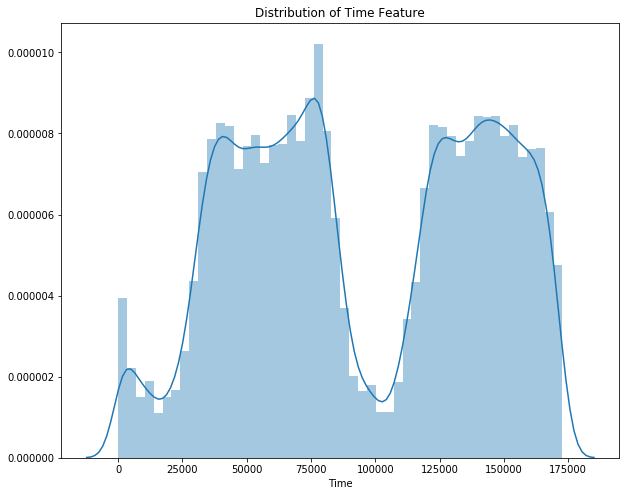

In [16]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(d.Time)
#sns.distplot(d[fraud].Time)

## Machine Learning - Logistics Regression

In [17]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_test.shape

(197, 30)

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
#apply cross validation
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(clf, X_train, y_train, cv=10)
training_score

C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\qmhua\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

array([0.95      , 0.975     , 0.97468354, 0.98734177, 0.92405063,
       0.8974359 , 0.97435897, 0.94871795, 0.91025641, 0.94871795])

In [22]:
#apply model and use test set to get y prediction
#use confusion matrix to evaulate the logistic regression
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
log_cf = confusion_matrix(y_test, y_pred)
log_cf

array([[85,  2],
       [13, 97]], dtype=int64)

In [23]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

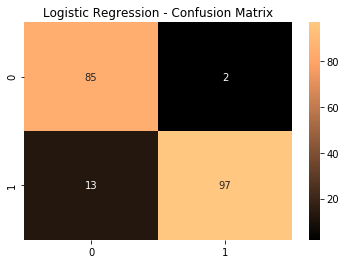

In [24]:
#let us visulize the confusion matrix from the test set which is 20% 
ax = plt.axes()
sns.heatmap(log_cf, annot=True, cmap=plt.cm.copper, ax =ax)

ax.set_title("Logistic Regression - Confusion Matrix")
plt.show()

Ths is a graph for Confusion Matrix. The following shows a right way to interpret the results. 

|True Negative | False Negative|
|--------------|---------------|
|False Positive| True Positive |

As the graph shows, 86 is true nagative and 97 is true positive. These means that this logistic model predicts 183 out of 197 cases in the right category. 13 is False Postive which means it should non-fraud but model predicts them as fraud, and  1 is False Negative which means logistic model predict this case as fraud but it is not. As a result, 14 out of 197 are in the wrong category. The accuracy score is 92.9%.

## Finding the relationship between various Variables with respect to Fraudulent transactions

C:\Users\qmhua\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


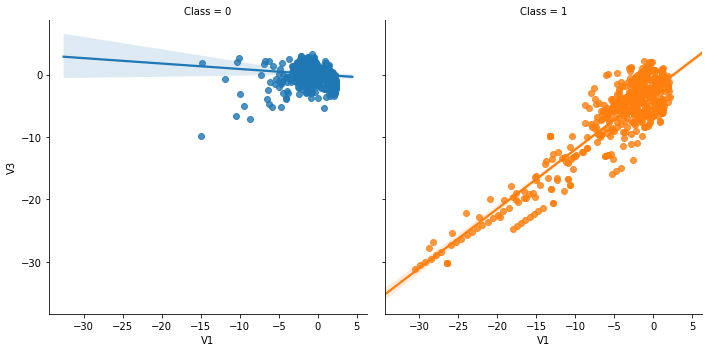

In [25]:
sns.lmplot(x = 'V1', y = 'V3', data = balancedset, hue = 'Class', col = 'Class')

The above Implot depicts the relationship between V1 & V3 in determining fraudulent vs non-fraudulent transactions. There is high chance of a transaction of being fraudulent if the factors V1 & V3 are less than -5.

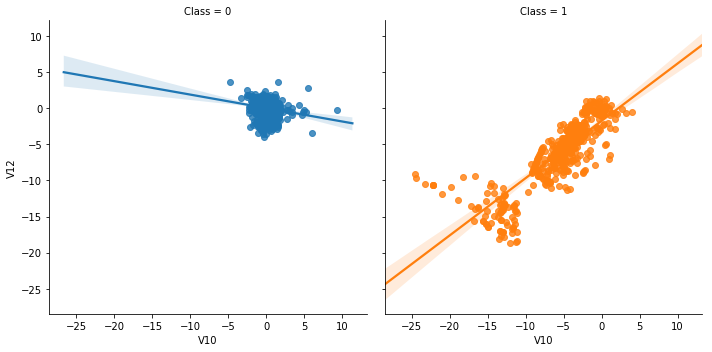

In [26]:
sns.lmplot(x = 'V10', y = 'V12', data = balancedset, hue = 'Class', col = 'Class')

The above Implot depicts the relationship between V10 & V12 in determining fraudulent vs non-fraudulent transactions. There is high chance of a transaction of being fraudulent if the factors V10 & V12 are less than -3.

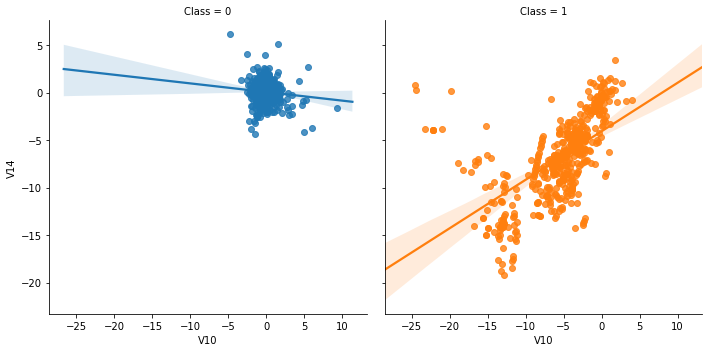

In [27]:
sns.lmplot(x = 'V10', y = 'V14', data = balancedset, hue = 'Class', col = 'Class')

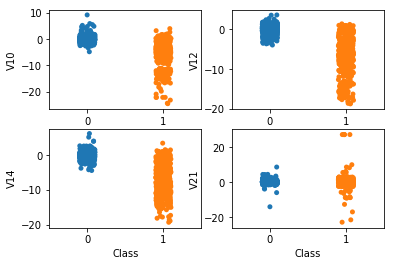

In [28]:
plt.subplot(2,2,1)
sns.stripplot(x = 'Class', y = 'V10', data = balancedset, jitter = True)
plt.subplot(2,2,2)
sns.stripplot(x = 'Class', y = 'V12', data = balancedset, jitter = True)
plt.subplot(2,2,3)
sns.stripplot(x = 'Class', y = 'V14', data = balancedset, jitter = True)
plt.subplot(2,2,4)
sns.stripplot(x = 'Class', y = 'V21', data = balancedset, jitter = True)

Some more graphs (Strip Plot) to show the similar relationship between the variables V10, V12, V14 & V21. Fraudulent transactions are more predictable if these variables are less than -5.

C:\Users\qmhua\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


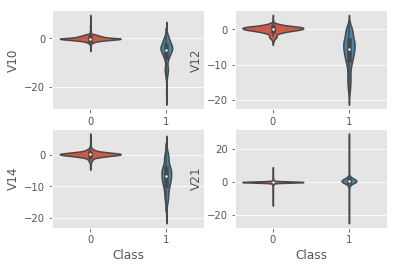

In [29]:
plt.style.use('ggplot')
plt.subplot(2,2,1)
sns.violinplot(x = 'Class', y = 'V10', data = balancedset)
plt.subplot(2,2,2)
sns.violinplot(x = 'Class', y = 'V12', data = balancedset)
plt.subplot(2,2,3)
sns.violinplot(x = 'Class', y = 'V14', data = balancedset)
plt.subplot(2,2,4)
sns.violinplot(x = 'Class', y = 'V21', data = balancedset)

Some more graphs (Violin Plot) to show the similar relationship between the variables V10, V12, V14 & V21. Fraudulent transactions are more predictable if these variables are less than -5.

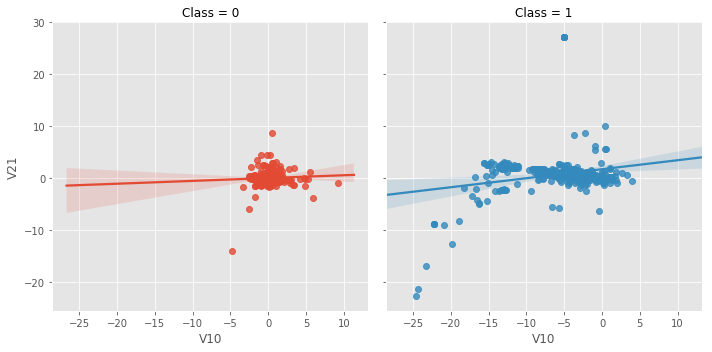

In [30]:
sns.lmplot(x = 'V10', y = 'V21', data = balancedset, hue = 'Class', col = 'Class')

#K-Nearest Neighbour

#Preparing the data for classification - X for feature matrix, y for target column
Splitting dataset to feature matrix, convetionally is shown by X (capital X), and target values, conventionaly is represented by y (lower case y). When we have a matrix (2d array) of values, usually we use capital letters for them, and for arryas (1d arrays), we use lowercases.

# We will be trying KNN on different combinations of Fraudulent and Non-Fraudulent transactions. We will be using 50%, 67%, 75%, 80%, 90% & 95% ratio of non-fraudulent to fraudulent transactions.

In [31]:
balancedSet50 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud))])
balancedSet50.shape

(984, 31)

In [32]:
X = df2.drop('Class', axis=1)
y = df2['Class']

X50=balancedSet50[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]
X50.head()
X50.shape

(984, 30)

In [33]:
y50=balancedSet50['Class']
y50.head()

541     1
623     1
4920    1
6108    1
6329    1
Name: Class, dtype: int64

In [34]:
y50.shape

(984,)

#Run the fit using KNeighborsClassifier from sklearn.neighbors.
First, instantiate the model and then run classifier on the training set.

In [35]:
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.metrics import accuracy_score
 knn = KNeighborsClassifier(n_neighbors=5)
 knn.fit(X50,y50)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#Predicting by the trained (fitted) model

predict function can take values in the same format of feature matrix to predict a label for them. The estimated (predicted) values are called y^ (which is called y-hat).

In [36]:
y50_hat = knn.predict(X50)
y50_hat.shape
#y50_hat

(984,)

In [37]:
accuracy_50=accuracy_score(y50_hat, y50)
accuracy_50

0.7723577235772358

In [38]:
balancedSet67 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*2)])
#balancedSet70 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*2.333)])
balancedSet75 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*3)])
balancedSet80 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*4)])
balancedSet90 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*9)])
balancedSet95 = pd.concat([allfraud, allnonfraud.sample(n=len(allfraud)*19)])

balancedSet67.shape

(1476, 31)

In [39]:
X67=balancedSet67[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]

X75=balancedSet75[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]


X80=balancedSet80[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]

X90=balancedSet90[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]

X95=balancedSet95[["Time", "V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12",
                   "V13", "V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24",
                   "V25","V26","V27","V28","Amount"]]

y67=balancedSet67['Class']
y75=balancedSet75['Class']
y80=balancedSet80['Class']
y90=balancedSet90['Class']
y95=balancedSet95['Class']

knn.fit(X67,y67)
y67_hat = knn.predict(X67)
accuracy_67=accuracy_score(y67_hat, y67)

accuracy_67


0.80420054200542

In [40]:
knn.fit(X75,y75)
y75_hat = knn.predict(X75)
accuracy_75=accuracy_score(y75_hat, y75)
accuracy_75

0.8236788617886179

In [41]:
knn.fit(X80,y80)
y80_hat = knn.predict(X80)
accuracy_80=accuracy_score(y80_hat, y80)
accuracy_80

0.8605691056910569

In [42]:
knn.fit(X90,y90)
y90_hat = knn.predict(X90)
accuracy_90=accuracy_score(y90_hat, y90)
accuracy_90

0.9225609756097561

In [43]:
knn.fit(X95,y95)
y95_hat = knn.predict(X95)
accuracy_95=accuracy_score(y95_hat, y95)
accuracy_95

0.9592479674796748

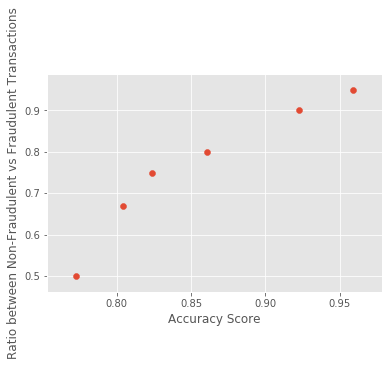

In [44]:
x5=np.array([accuracy_50, accuracy_67, accuracy_75, accuracy_80,accuracy_90,accuracy_95])
y5=np.array([0.5, 0.67,0.75,0.8,0.9,0.95])


plt.scatter(x5,y5)
plt.xlabel('Accuracy Score')
plt.ylabel('Ratio between Non-Fraudulent vs Fraudulent Transactions')
plt.show()


The above scatter plot show the prediction accuracy increases as the ratio of non-fraudulent transactions vs fraudulent transactions increases in the balanced Dataset.

#Conclusion:

In the above Project, we have selected the Credit Card Fraud Transactions as data set, transformed and cleaned it, conducted data analysis, and reported key statistical features and insights of the data.

The data was sourced from Kaggle, and is a standard machine learning data. 
We have performed append function to combine the dataframe, describe & shape functions to determine the data quality. The data was found to be imbalanced i.e. 99.83% of the transactions were non-fraudulent and accordingly there was a need to create a balanced dataset otherwise the analysis could have been very skewed and the predictions will always be closer to 100% of accuracy.

We have used a number of visualizations to determine which of the variables can be more relevant in correctly predicting a fraudulent transaction from overall transactions and what could be the range of possible values of those variables.

We have performed two prediction models i.e. Logistics Regression & K-Nearest Neighbour and noted the prediction scores are between 89.8% to 97.4% using Logistics Regression and between 62% to 96% using KNN on different balance of dataset.